# Prepare the Environment

In [ ]:
# List all NVIDIA GPUs as avaiable in this computer (or colub's session)
#!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [27]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline
print(f"Python {sys.version}")
print(f"NumPy {np.__version__}")
print(f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}")
gpus = tf.config.list_physical_devices('GPU')
print(f"Tensorflow detected : {len(gpus)} GPU(s)")
for i,gpu in enumerate(gpus):
  print(f" GPU No. {i} : Name = {gpu.name} , Type = {gpu.device_type}")


Python 3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]
NumPy 1.21.5
tf.keras.backend.image_data_format() = channels_last
Tensorflow detected : 0 GPU(s)


# Load Image to numpy by  tf.keras.preprocessing.image

In [28]:
#mount my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Get File From Gdrive to sample_data (Skip)

In [ ]:
#Change directory to your google drive
%cd /content/drive/MyDrive/Colab Notebooks/BADS7604_DL/GroupAssignment02-PictureHashtag/data
#Copy file to sample_data
%cp './img-food-menu-atmos.tar.gz' '/content/sample_data'

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/BADS7604_DL/GroupAssignment02-PictureHashtag/data'
/content
cp: cannot stat './img-food-menu-atmos.tar.gz': No such file or directory


In [ ]:
#Change directory to sample_data
%cd '/content/sample_data'

#Extract file img-food-menu-atmos.tar.gz
!tar -xzvf './img-food-menu-atmos.tar.gz'

/content/sample_data
tar (child): ./img-food-menu-atmos.tar.gz: Cannot open: No such file or directory
tar (child): Error is not recoverable: exiting now
tar: Child returned status 2
tar: Error is not recoverable: exiting now


## Get File From GCS to sample_data

In [29]:
#Change directory to sample_data
%cd '/content/sample_data'

/content/sample_data


In [30]:
#Download File From gcs
!wget -O 'img.tar.gz' 'https://storage.googleapis.com/smart-engine-public-images/campaign/00_Taitip/CAMP2203/img-food-menu-atmos.tar.gz'

--2022-03-12 04:12:06--  https://storage.googleapis.com/smart-engine-public-images/campaign/00_Taitip/CAMP2203/img-food-menu-atmos.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.234.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 689004504 (657M) [application/gzip]
Saving to: ‘img.tar.gz’

img.tar.gz          100%[===================>] 657.08M  74.0MB/s    in 14s     

2022-03-12 04:12:22 (46.1 MB/s) - ‘img.tar.gz’ saved [689004504/689004504]



In [31]:
#Unzip File
!tar -xzvf 'img.tar.gz'

atmosphere/
atmosphere/atmosphere_001.jpg
atmosphere/atmosphere_002.jpg
atmosphere/atmosphere_003.jpg
atmosphere/atmosphere_004.jpg
atmosphere/atmosphere_005.jpg
atmosphere/atmosphere_006.jpg
atmosphere/atmosphere_007.jpg
atmosphere/atmosphere_008.jpg
atmosphere/atmosphere_009.jpg
atmosphere/atmosphere_010.jpg
atmosphere/atmosphere_011.jpg
atmosphere/atmosphere_012.jpg
atmosphere/atmosphere_013.jpg
atmosphere/atmosphere_014.jpg
atmosphere/atmosphere_015.jpg
atmosphere/atmosphere_016.jpg
atmosphere/atmosphere_017.jpg
atmosphere/atmosphere_018.jpg
atmosphere/atmosphere_019.jpg
atmosphere/atmosphere_020.jpg
atmosphere/atmosphere_021.jpg
atmosphere/atmosphere_022.jpg
atmosphere/atmosphere_023.jpg
atmosphere/atmosphere_024.jpg
atmosphere/atmosphere_025.jpg
atmosphere/atmosphere_026.jpg
atmosphere/atmosphere_027.jpg
atmosphere/atmosphere_028.jpg
atmosphere/atmosphere_029.jpg
atmosphere/atmosphere_030.jpg
atmosphere/atmosphere_031.jpg
atmosphere/atmosphere_032.jpg
atmosphere/atmosphere_033.jp

In [32]:
#Remove File
!rm 'img.tar.gz'

## Read Image and convert to numpy

In [33]:
#Read image and save to dict
def read_image(output_size):
  """
  output_size is input_shape that keras model request.
  example :
  InceptionV3 is (299, 299)
  ResNet50 is (224, 224)
  NasNetLarge is (331, 331)
  NASNetMobile  is (224, 224)
  look at https://keras.io/api/applications/

  fundtion return x, y and class sequence
  """
  img_dict = {}
  for img_class in ['atmosphere','food','menu']:
    print(f"Start read image in {img_class} ...")
    lst_img = []
    for img_file in os.listdir(f"./{img_class}"):
      try :
        img = tf.keras.preprocessing.image.load_img(f"./{img_class}/{img_file}"  ,target_size=output_size)
        img = tf.keras.preprocessing.image.img_to_array(img)
        lst_img.append(img)
      except :
        print(img_file)
    img_dict[img_class] = lst_img
  atmosphere = np.array(img_dict['atmosphere'])
  food = np.array(img_dict['food'])
  menu = np.array(img_dict['menu'])
  x_image = np.vstack((atmosphere, food, menu))
  y_image = np.hstack((np.ones(len(atmosphere))*0, np.ones(len(food))*1, np.ones(len(menu))*2))

  return x_image, y_image ,np.array(['atmosphere', 'food', 'menu'])

In [34]:
%%time
x_image, y_image, class_seq = read_image(output_size=(224, 224))
print(f"x_image.shape : {x_image.shape}")
print(f"y_image.shape : {y_image.shape}")

Start read image in atmosphere ...
img-food-menu-atmos.tar.gz
Start read image in food ...
Start read image in menu ...
x_image.shape : (600, 224, 224, 3)
y_image.shape : (600,)
CPU times: user 47.8 s, sys: 5.08 s, total: 52.9 s
Wall time: 52.9 s


## Save numpy array

In [35]:
path = "/content/drive/MyDrive/Colab Notebooks"
np.save(path+"/x_image_224_224.npy"  ,x_image)
np.save(path+"/y_image.npy"  ,y_image)
np.save(path+"/class_seq.npy"  ,class_seq)

# Load Existing data

In [36]:
path = "/content/drive/MyDrive/Colab Notebooks"

x_image = np.load(path+"/x_image_224_224.npy" )
y_image = np.load(path+"/y_image.npy"  )
class_dict = {i:nam for i,nam in enumerate(np.load(path+"/class_seq.npy" ))}

In [37]:
num_class,num_member = np.unique(y_image, return_counts=True)
{'class':[class_dict[i] for i in num_class] 
,'Image':num_member}


{'Image': array([200, 200, 200]), 'class': ['atmosphere', 'food', 'menu']}

#Train Test Split The Data

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split( x_image, y_image, test_size=0.33, random_state=1234)

print( f"x_train.shape={x_train.shape}, x_train.dtype={x_train.dtype}, min(x_train)={np.min(x_train):.4f} ,max(x_train)={np.max(x_train):.4f}")
print( f"x_test.shape={x_test.shape}, x_test.dtype={x_test.dtype}, min(x_test)={np.min(x_test):.4f} ,max(x_test)={np.max(x_test):.4f}\n")
print( f"y_train.shape={y_train.shape}, y_train.dtype={y_train.dtype}, min(y_train)={np.min(y_train):.4f} ,max(y_train)={np.max(y_train):.4f}")
print( f"y_test.shape={y_test.shape}, y_test.dtype={y_test.dtype}, min(y_test)={np.min(y_test):.4f} ,max(y_test)={np.max(y_test):.4f}")

x_train.shape=(402, 224, 224, 3), x_train.dtype=float32, min(x_train)=0.0000 ,max(x_train)=255.0000
x_test.shape=(198, 224, 224, 3), x_test.dtype=float32, min(x_test)=0.0000 ,max(x_test)=255.0000

y_train.shape=(402,), y_train.dtype=float64, min(y_train)=0.0000 ,max(y_train)=2.0000
y_test.shape=(198,), y_test.dtype=float64, min(y_test)=0.0000 ,max(y_test)=2.0000


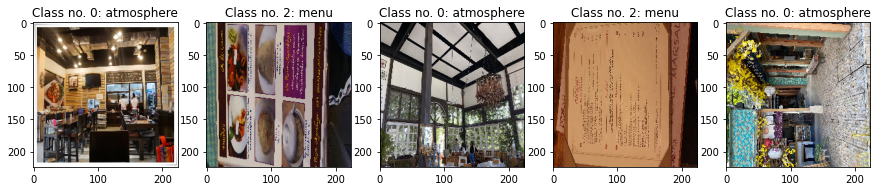

In [39]:
#Visulize the first image in x_train
plt.figure(figsize=(15,5))
for i in range(5):
  plt.subplot(150+1+i).set_title(f"Class no. {int(y_train[i])}: {class_dict[int(y_train[i])]}")
  plt.imshow( x_train[i].astype(np.uint8))
plt.show()

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import seaborn as sns

In [44]:
 resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(3, activation='softmax'))

In [45]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [104]:
history = resnet_model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),verbose=2,batch_size=128)

Epoch 1/50
4/4 - 53s - loss: 0.2037 - accuracy: 0.9303 - val_loss: 0.3384 - val_accuracy: 0.8889 - 53s/epoch - 13s/step
Epoch 2/50
4/4 - 50s - loss: 0.1660 - accuracy: 0.9428 - val_loss: 0.4191 - val_accuracy: 0.9040 - 50s/epoch - 12s/step
Epoch 3/50
4/4 - 50s - loss: 0.1960 - accuracy: 0.9502 - val_loss: 0.2139 - val_accuracy: 0.9343 - 50s/epoch - 13s/step
Epoch 4/50
4/4 - 49s - loss: 0.0404 - accuracy: 0.9900 - val_loss: 0.0921 - val_accuracy: 0.9747 - 49s/epoch - 12s/step
Epoch 5/50
4/4 - 49s - loss: 0.0441 - accuracy: 0.9801 - val_loss: 0.0767 - val_accuracy: 0.9545 - 49s/epoch - 12s/step
Epoch 6/50
4/4 - 49s - loss: 0.0234 - accuracy: 0.9900 - val_loss: 0.1252 - val_accuracy: 0.9495 - 49s/epoch - 12s/step
Epoch 7/50
4/4 - 49s - loss: 0.0085 - accuracy: 0.9950 - val_loss: 0.0915 - val_accuracy: 0.9545 - 49s/epoch - 12s/step
Epoch 8/50
4/4 - 49s - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.0915 - val_accuracy: 0.9596 - 49s/epoch - 12s/step
Epoch 9/50
4/4 - 48s - loss: 0.0029 - ac

In [105]:
pred = resnet_model.predict(x_test)

In [106]:
pred_class = []
for i in pred:
  a = np.argmax(i)
  pred_class.append(a)

In [107]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_auc_score,roc_curve
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer

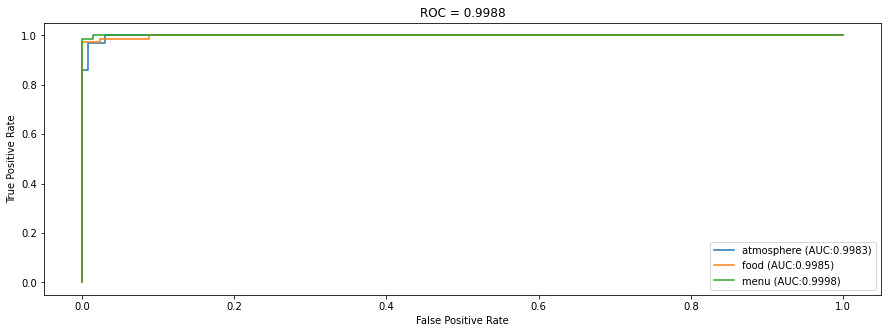

In [108]:
y_prob = resnet_model.predict(x_test)
y_label = LabelBinarizer().fit_transform(y_test)
classSeq = class_dict.values()
class_auc = []
plt.figure(figsize=(15,5))

for c,nam in enumerate(classSeq):
  fpr, tpr, thresholds = roc_curve(y_label[:,c], y_prob[:,c])
  class_auc.append(auc(fpr, tpr))
  plt.plot(fpr, tpr, label = f"{nam} (AUC:{class_auc[c]:0.4f})")
  
roc_score = roc_auc_score(y_label, y_prob, average="macro")
plt.legend()
plt.title(f"ROC = {roc_score:0.4f}")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
  

In [109]:
roc_auc_score(y_test,pred,multi_class='ovr')

0.9988235104361413

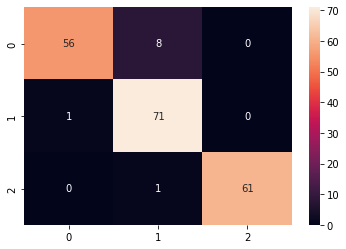

In [110]:
sns.heatmap(confusion_matrix(y_test,pred_class),annot=True)

In [111]:
print(classification_report(y_test,pred_class))

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93        64
         1.0       0.89      0.99      0.93        72
         2.0       1.00      0.98      0.99        62

    accuracy                           0.95       198
   macro avg       0.96      0.95      0.95       198
weighted avg       0.95      0.95      0.95       198



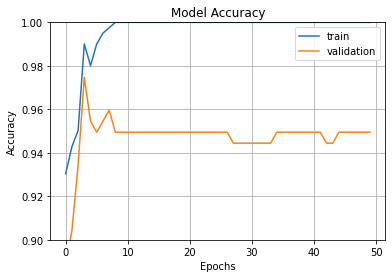

In [112]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.9,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

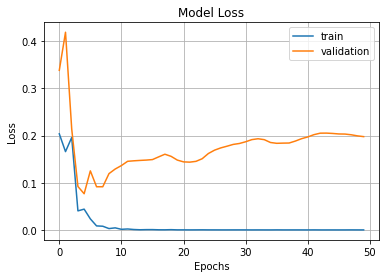

In [113]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()